In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
from tkinter import font
from turtle import color
from cairo import FontWeight
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_prepared = pd.read_csv('df_prepared.csv')

X = df_prepared.drop(columns=['price'])
y = df_prepared['price']

### Linear Regression

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


#Standartazing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, y_train)
X_test_scaled = scaler.transform(X_test)


#model building
model = LinearRegression()
model.fit(X_train_scaled, y_train)

#predictions
y_pred = model.predict(X_test_scaled)

# numpPy array converting to pandas series
predictions = pd.Series(data=y_pred, name='Predictions')


#model evaluating
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3572.45839630756
R-squared: 0.14876966523654578


In [5]:
# Real values vs predicted values comparison
comparison = pd.DataFrame({'Actual Price': y_test.reset_index(drop=True), 'Predicted Price': y_pred})

# Display the first few rows of the comparison
print(comparison.head(10))

   Actual Price  Predicted Price
0            72       136.922486
1            59       110.850074
2           142       116.469434
3           133       138.024583
4            95        98.893178
5           163       130.468183
6           105       112.636915
7            64        73.988309
8           138       106.868832
9            85        96.707672


### Cross validation

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Cross validation for accuracy evaluation (tikslumo vertinimas)
scores_5 = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
scores_10 = cross_val_score(model, X_train_scaled, y_train, cv= 10, scoring='r2')

print(f'Cross validation r2 mean (cv=5): {scores_5.mean()}')
print(f'Cross validation r2 value (cv=5): {scores_5}')
print(f'Cross validation r2 mean (cv=10):{scores_10.mean()}')
print(f'Cross validation r2 value (cv=10):{scores_10}')

Cross validation r2 mean (cv=5): 0.12345043655822732
Cross validation r2 value (cv=5): [0.09928532 0.13527015 0.11341465 0.12592354 0.14335851]
Cross validation r2 mean (cv=10):0.12368861651315759
Cross validation r2 value (cv=10):[0.10097967 0.09876771 0.1398563  0.13248626 0.10664923 0.12173457
 0.10302748 0.14693678 0.13973666 0.1467115 ]


In [7]:
# Define a preprocessing pipeline for numeric features
numeric_features = X.columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_features)
    ])

# polynomical features definition and ridge regression model
poly = PolynomialFeatures(degree=2)
scaler = StandardScaler()
ridge_model = Ridge(alpha=1.0)

ridge_model = Ridge(alpha=1.0, fit_intercept=True, copy_X=True, max_iter=1000, tol=0.0001, solver='auto')

model = make_pipeline(scaler, poly, Ridge(alpha=4.0))
model = make_pipeline(
    preprocessor,
    poly,
    scaler,
    ridge_model
)


#data ploting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# We train the model with the training data
model.fit(X_train, y_train)

#Perform cross-validation and assess model accuracy
scores = cross_val_score(model, X, y, cv=10, scoring='r2')
print("Kryžminės validacijos R^2 reikšmės:", scores)
print("Vidutinis R^2 tikslumas:", scores.mean())

Kryžminės validacijos R^2 reikšmės: [0.11150141 0.04418542 0.06784472 0.07717581 0.03658045 0.15935684
 0.13006071 0.12794373 0.14562713 0.15839581]
Vidutinis R^2 tikslumas: 0.1058672014369133


In [8]:
# Creating Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)

# Setting hyperparameters web 
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

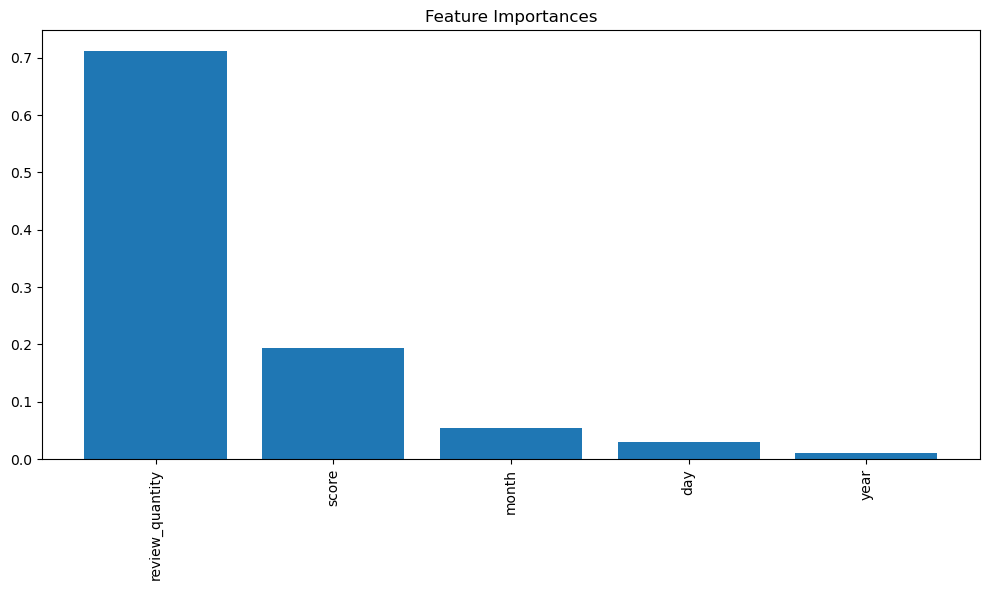

Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Accuracy MSE (Mean squared error):289.03915250956385
Testing MSE: 478.1508847854086
Training R2: 0.9265723741528626
Testing R2: 0.8860682217757914
Cross validation (cv=5) R2 values: [0.88408898 0.83254207 0.87609903 0.8722993  0.8996216 ]
Cross validation  (cv=5) mean R2: 0.8729301972208114
Cross validation  (cv=10) R2 values: [0.8823652  0.89068561 0.74024617 0.82516335 0.88469876 0.89060215
 0.88403185 0.86345191 0.90955378 0.8977126 ]
Cross validation  (cv=10) mean R2: 0.8668511381662931


In [9]:
# Using GridSearch to find best params
grid_search.fit(X_train_scaled, y_train)

# Best parameters
best_params = grid_search.best_params_

# best model
best_model = grid_search.best_estimator_

# Doing prognosis with best model 
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# Evaluating model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

#Cross validation with full data set
X_combined = pd.concat([X_train, X_test])
y_combined = pd.concat([y_train, y_test])
X_combined_scaled = scaler.fit_transform(X_combined)

cv_scores_5 = cross_val_score(best_model, X_combined_scaled, y_combined, cv=5, scoring='r2')
cv_scores_10 = cross_val_score(best_model, X_combined_scaled, y_combined, cv=10, scoring='r2')

#Feature importances
feature_importances = best_model.feature_importances_
features = X.columns

indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

#Printing results

print(f'Best parameters: {best_params}')
print(f'Accuracy MSE (Mean squared error):{train_mse}')
print(f'Testing MSE: {test_mse}')
print(f'Training R2: {train_r2}')
print(f'Testing R2: {test_r2}')

print(f'Cross validation (cv=5) R2 values: {cv_scores_5}')
print(f'Cross validation  (cv=5) mean R2: {cv_scores_5.mean()}')

print(f'Cross validation  (cv=10) R2 values: {cv_scores_10}')
print(f'Cross validation  (cv=10) mean R2: {cv_scores_10.mean()}')